# Predict Car's Market Price

## 1. Introduction to Dataset

Dalam project ini kita akan mencoba memprediksi harga pasar sebuah mobil dari berbagai atribut yang dimilikinya. Dataset yang akan kita gunakan mempunyai informasi teknis masing-masing mobil. Untuk penjelasan dataset lebih lengkap dapat dilihat [disini](https://archive.ics.uci.edu/ml/datasets/automobile)

In [2]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression-rate horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68               9.0        111     5000        21           27   
1  3.47   2.68               9.0        111     5000        21           27   
2  2.68   3.47               9.0        154     5000        19           26   
3  3.19   3.40              10.0        102     5500        24           30   
4  3.19   3.40               8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

In [3]:
#Memakai kolom yang bernilai kontinu
features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
data = cars[features]
data.head()

normalized-losses  wheel-base  length  width  height  curb-weight  \
0                 ?        88.6   168.8   64.1    48.8         2548   
1                 ?        88.6   168.8   64.1    48.8         2548   
2                 ?        94.5   171.2   65.5    52.4         2823   
3               164        99.8   176.6   66.2    54.3         2337   
4               164        99.4   176.6   66.4    54.3         2824   

   engine-size  bore stroke  compression-rate horsepower peak-rpm  city-mpg  \
0          130  3.47   2.68               9.0        111     5000        21   
1          130  3.47   2.68               9.0        111     5000        21   
2          152  2.68   3.47               9.0        154     5000        19   
3          109  3.19   3.40              10.0        102     5500        24   
4          136  3.19   3.40               8.0        115     5500        18   

   highway-mpg  price  
0           27  13495  
1           27  16500  
2           26  16500  
3           30  13950  
4           22  17450

# 2. Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [6]:
data = data.replace('?',np.nan)
data.head()

normalized-losses  wheel-base  length  width  height  curb-weight  \
0               NaN        88.6   168.8   64.1    48.8         2548   
1               NaN        88.6   168.8   64.1    48.8         2548   
2               NaN        94.5   171.2   65.5    52.4         2823   
3               164        99.8   176.6   66.2    54.3         2337   
4               164        99.4   176.6   66.4    54.3         2824   

   engine-size  bore stroke  compression-rate horsepower peak-rpm  city-mpg  \
0          130  3.47   2.68               9.0        111     5000        21   
1          130  3.47   2.68               9.0        111     5000        21   
2          152  2.68   3.47               9.0        154     5000        19   
3          109  3.19   3.40              10.0        102     5500        24   
4          136  3.19   3.40               8.0        115     5500        18   

   highway-mpg  price  
0           27  13495  
1           27  16500  
2           26  16500  
3           30  13950  
4           22  17450

In [23]:
data = data.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [24]:
data.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [25]:
#Menghilangkan data null pada kolom price karena kita ingin memprediksi kolom itu
data = data.dropna(subset=['price'])
data.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [27]:
#Mereplace null value di data dengan mean masing-masing kolom
data = data.fillna(data.mean())
data.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [28]:
#Normalize kolom2 selain kolom price
price = data['price']
data = (data-data.mean())/data.std()
data['price'] = price
data.head()

normalized-losses  wheel-base    length     width    height  curb-weight  \
0           0.000000   -1.680910 -0.438315 -0.851335 -2.029015    -0.014821   
1           0.000000   -1.680910 -0.438315 -0.851335 -2.029015    -0.014821   
2           0.000000   -0.708334 -0.243544 -0.185134 -0.558319     0.516789   
3           1.312654    0.165335  0.194690  0.147966  0.217881    -0.422710   
4           1.312654    0.099398  0.194690  0.243137  0.217881     0.518722   

   engine-size      bore    stroke  compression-rate  horsepower  peak-rpm  \
0     0.075201  0.519597 -1.825369         -0.290709    0.203476 -0.245942   
1     0.075201  0.519597 -1.825369         -0.290709    0.203476 -0.245942   
2     0.604724 -2.427374  0.674254         -0.290709    1.354267 -0.245942   
3    -0.430252 -0.524899  0.452769         -0.041019   -0.037387  0.799836   
4     0.219617 -0.524899  0.452769         -0.540399    0.310527  0.799836   

   city-mpg  highway-mpg    price  
0 -0.650624    -0.540937  13495.0  
1 -0.650624    -0.540937  16500.0  
2 -0.961995    -0.687669  16500.0  
3 -0.183569    -0.100741  13950.0  
4 -1.117680    -1.274597  17450.0

# 3. Univariate Model

In [47]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
def knn_train_test(train_col,target_col,df):
    knn = KNeighborsRegressor()
    kf = KFold(5,shuffle=True,random_state=1)
    mse = cross_val_score(knn,df[[train_col]],df[target_col],scoring='neg_mean_squared_error',cv=kf)
    avg_rmse = np.mean(np.sqrt(np.abs(mse)))
    return avg_rmse


In [36]:
data.columns.tolist()

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [49]:
rmse_cols = {}
for col in data.columns.drop('price').tolist():
    rmse_cols[col] = knn_train_test(col,'price',data)
rmse_cols

{'bore': 6893.4125273104455,
 'city-mpg': 4445.030818499132,
 'compression-rate': 6340.700506617709,
 'curb-weight': 4312.246802669906,
 'engine-size': 3191.8329775367115,
 'height': 7599.242213250058,
 'highway-mpg': 4140.2917258705975,
 'horsepower': 3791.305719968983,
 'length': 5663.368427482166,
 'normalized-losses': 7095.507625709315,
 'peak-rpm': 7494.098492564672,
 'stroke': 7077.7115800881675,
 'wheel-base': 6028.665651194356,
 'width': 4268.079722169978}

In [51]:
def knn_train_test_k(train_col,target_col,df):
    k_neighbors = [1,3,5,7,9]
    k_mse={}
    for k in k_neighbors:
        knn = KNeighborsRegressor(n_neighbors=k)
        kf = KFold(5,shuffle=True,random_state=1)
        mse = cross_val_score(knn,df[[train_col]],df[target_col],scoring='neg_mean_squared_error',cv=kf)
        avg_rmse = np.mean(np.sqrt(np.abs(mse)))
        k_mse[k] = avg_rmse
    return k_mse

In [52]:
rmse_k_cols = {}
for col in data.columns.drop('price').tolist():
    rmse_k_cols[col] = knn_train_test_k(col,'price',data)
rmse_k_cols

{'bore': {1: 8704.760007703995,
  3: 6631.371348737125,
  5: 6893.4125273104455,
  7: 6918.454255695999,
  9: 6638.299992593335},
 'city-mpg': {1: 5692.590421689251,
  3: 4474.047416038924,
  5: 4445.030818499132,
  7: 4388.1461650424335,
  9: 4350.209578045904},
 'compression-rate': {1: 7840.644305559162,
  3: 6483.741881988771,
  5: 6340.700506617709,
  7: 6327.45050070889,
  9: 6506.3395471824115},
 'curb-weight': {1: 5263.210350129792,
  3: 4686.002186106076,
  5: 4312.246802669906,
  7: 4047.523166566078,
  9: 3977.0983239890484},
 'engine-size': {1: 3548.02318885446,
  3: 3069.094586103613,
  5: 3191.8329775367115,
  7: 3424.569552452859,
  9: 3534.9051444858183},
 'height': {1: 9267.972331603416,
  3: 7577.75231284287,
  5: 7599.242213250058,
  7: 7553.842874680279,
  9: 7595.713359251711},
 'highway-mpg': {1: 5732.722405327001,
  3: 4595.235433493302,
  5: 4140.2917258705975,
  7: 4324.844299728891,
  9: 4307.082614639321},
 'horsepower': {1: 4043.930895951472,
  3: 3740.151786

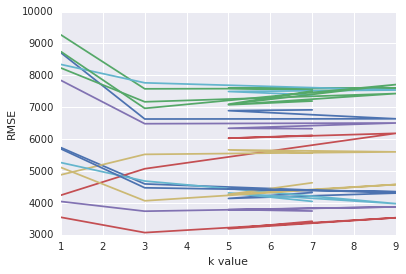

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
key = list(rmse_k_cols.keys())
for k in key :
    values = rmse_k_cols[k]
    y=[]
    x = list(values.keys())
    for i in list(values.keys()):
        y.append(values[i])
    
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    #plt.legend(k)

In [127]:
test = {'col':['test'],'k':['test'],'values':['test']}
df = pd.DataFrame(data=test)
for i in list(rmse_k_cols.keys()):
    rmse = rmse_k_cols[i]
    val = []
    keys = list(rmse.keys())
    #keys = keys.sort()
    #print(keys)
    for key in keys:
        #print(key)
        val.append(rmse[key])
        #print(val)
    col = {'col':[i,i,i,i,i],'k':keys , 'values':val}
    df1 = pd.DataFrame(data=col)
    df = pd.concat([df,df1])
df = df.reset_index(drop=True)
df=df.drop([0])
df

col  k   values
1         highway-mpg  1  5732.72
2         highway-mpg  3  4595.24
3         highway-mpg  9  4307.08
4         highway-mpg  5  4140.29
5         highway-mpg  7  4324.84
6              height  1  9267.97
7              height  3  7577.75
8              height  9  7595.71
9              height  5  7599.24
10             height  7  7553.84
11         wheel-base  1  4243.64
12         wheel-base  3  5071.66
13         wheel-base  9  6182.11
14         wheel-base  5  6028.67
15         wheel-base  7  6118.59
16   compression-rate  1  7840.64
17   compression-rate  3  6483.74
18   compression-rate  9  6506.34
19   compression-rate  5   6340.7
20   compression-rate  7  6327.45
21             length  1  4881.92
22             length  3   5522.4
23             length  9  5600.68
24             length  5  5663.37
25             length  7  5560.88
26        curb-weight  1  5263.21
27        curb-weight  3     4686
28        curb-weight  9   3977.1
29        curb-weight  5  4312.25
30        curb-weight  7  4047.52
..                ... ..      ...
41        engine-size  1  3548.02
42        engine-size  3  3069.09
43        engine-size  9  3534.91
44        engine-size  5  3191.83
45        engine-size  7  3424.57
46         horsepower  1  4043.93
47         horsepower  3  3740.15
48         horsepower  9  3873.88
49         horsepower  5  3791.31
50         horsepower  7  3745.69
51              width  1  5110.31
52              width  3  4066.51
53              width  9     4577
54              width  5  4268.08
55              width  7  4631.91
56           peak-rpm  1  8341.77
57           peak-rpm  3  7766.04
58           peak-rpm  9  7540.15
59           peak-rpm  5   7494.1
60           peak-rpm  7  7388.11
61           city-mpg  1  5692.59
62           city-mpg  3  4474.05
63           city-mpg  9  4350.21
64           city-mpg  5  4445.03
65           city-mpg  7  4388.15
66  normalized-losses  1  8742.03
67  normalized-losses  3  6966.12
68  normalized-losses  9  7711.74
69  normalized-losses  5  7095.51
70  normalized-losses  7  7511.29

[70 rows x 3 columns]

In [128]:
import seaborn as sns
sns.lineplot(x='k',y='values',hue='col',data=df)

AttributeError: 'module' object has no attribute 'lineplot'

In [112]:
df[df['col']=='height']

col  k   values
1  height  3  7577.75
2  height  9  7595.71
3  height  5  7599.24
4  height  7  7553.84

In [103]:
list(rmse.keys())
for l in list(rmse.keys()):
    print(l)

1
3
9
5
7


In [94]:
a

{1: 9267.972331603416,
 3: 7577.75231284287,
 5: 7599.242213250058,
 7: 7553.842874680279,
 9: 7595.713359251711}